In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv"
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Train test split

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
df.drop('Purchased',axis=1)

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[['User ID', 'Age', 'EstimatedSalary']],df['Purchased'],
                                                           test_size=.3,
                                                           random_state=0)
X_train.shape, X_test.shape  

((280, 3), (120, 3))

### StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)        # X_Train pass means two cols pass,,,,,,,,,and fit means to find mean to two columns

# transfrom train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
scaler.mean_

array([1.56917817e+07, 3.78642857e+01, 6.98071429e+04])

In [65]:
X_train

,User ID,Age,EstimatedSalary
92,15809823,26,15000
223,15593715,60,102000
234,15619407,38,112000
232,15813113,40,107000
377,15800215,42,53000
...,...,...,...
323,15619465,48,30000
192,15779581,29,43000
117,15591433,36,52000
47,15776348,27,54000


In [66]:
X_train_scaled

array([[ 1.67118864e+00, -1.16317240e+00, -1.58497030e+00],
       [-1.38839503e+00,  2.17018137e+00,  9.30986724e-01],
       [-1.02465642e+00,  1.33054037e-02,  1.22017719e+00],
       [ 1.71776734e+00,  2.09385037e-01,  1.07558195e+00],
       [ 1.53516184e+00,  4.05464670e-01, -4.86046541e-01],
       [-1.05683679e+00, -2.80814046e-01, -3.12532264e-01],
       [ 3.23874887e-01,  9.93703570e-01, -8.33075096e-01],
       [ 1.46554862e+00,  9.93703570e-01,  1.85639620e+00],
       [ 1.53940914e+00,  1.33054037e-02,  1.24909623e+00],
       [ 1.38792217e+00, -8.69052946e-01,  2.26126285e+00],
       [-1.71742331e-01, -1.16317240e+00, -1.58497030e+00],
       [-7.91253235e-01,  2.17018137e+00, -8.04156050e-01],
       [-1.70199146e-01, -1.35925203e+00, -1.46929411e+00],
       [ 1.38112224e-01,  4.05464670e-01,  2.29018190e+00],
       [-3.55452132e-01,  7.97623937e-01,  7.57472446e-01],
       [-1.39831955e+00, -9.67092763e-01, -3.12532264e-01],
       [-9.79663379e-01,  1.11345220e-01

In [67]:
# we get X_train_scaler in array so we have to convert into Dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [68]:
X_test_scaled

,User ID,Age,EstimatedSalary
0,0.479637,-0.771013,0.497201
1,-0.557553,0.013305,-0.572804
2,1.204283,-0.280814,0.150172
3,0.660686,-0.771013,0.265849
4,-0.761381,-0.280814,-0.572804
...,...,...,...
115,-0.789413,1.091743,-0.139018
116,1.747824,0.699584,1.769639
117,1.444524,-0.672973,0.555039
118,-1.046318,0.797624,0.352606


In [69]:
np.round(X_train.describe(), 1)

,User ID,Age,EstimatedSalary
count,280.0,280.0,280.0
mean,15691781.7,37.9,69807.1
std,70759.6,10.2,34641.2
min,15569641.0,18.0,15000.0
25%,15628197.2,30.0,43000.0
50%,15694424.0,37.0,70500.0
75%,15751110.8,46.0,88000.0
max,15814816.0,60.0,150000.0


In [70]:
np.round(X_train_scaled.describe(), 1)                  # mean = 0 and standrd deviation = 1

,User ID,Age,EstimatedSalary
count,280.0,280.0,280.0
mean,0.0,0.0,0.0
std,1.0,1.0,1.0
min,-1.7,-1.9,-1.6
25%,-0.9,-0.8,-0.8
50%,0.0,-0.1,0.0
75%,0.8,0.8,0.5
max,1.7,2.2,2.3


### Effect of Scalling

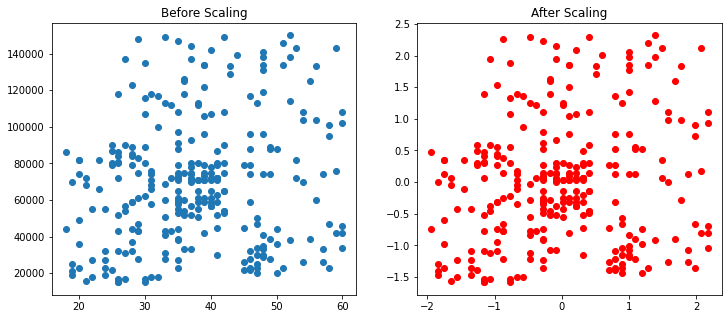

In [71]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
plt.show()

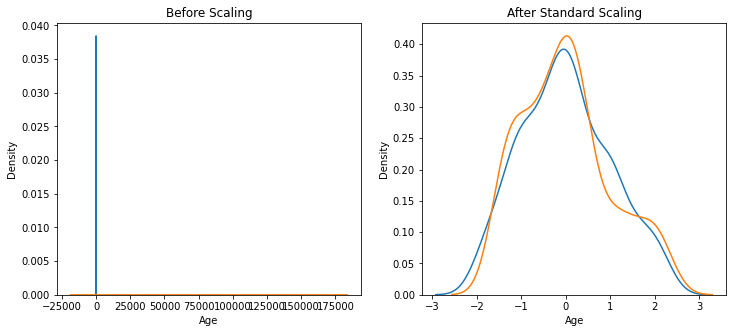

In [72]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax= ax2)
plt.show()

### Comparison of Distributions

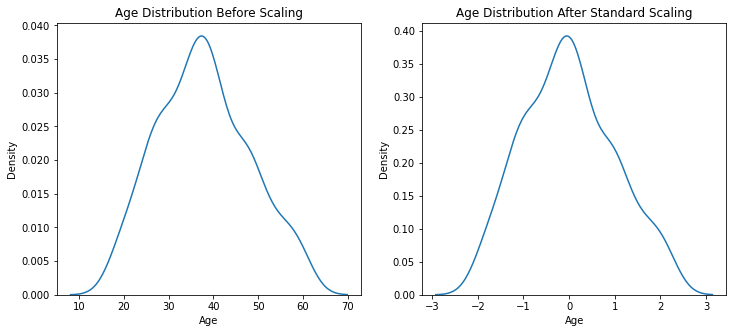

In [73]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax= ax1)


# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

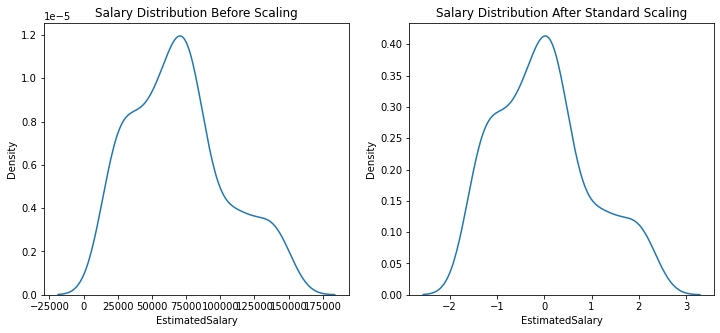

In [74]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax= ax1)


# after scaling
ax2.set_title('Salary Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

### Why Scaling is important

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [77]:
lr.fit(X_train, y_train)                            # unscaled Value
lr_scaled.fit(X_train_scaled, y_train)              # scaled Value

LogisticRegression()

In [78]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
print("Actuall", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actuall 0.7916666666666666
Scaled 0.8833333333333333


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [83]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [84]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [86]:
print("Actually", accuracy_score(y_test, y_pred))
print("Scaled", accuracy_score(y_test, y_pred_scaled))

Actually 0.8916666666666667
Scaled 0.9


In [87]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Effect of Outlier

In [91]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_6600\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [92]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510.0,Male,19,19000,0
1,15810944.0,Male,35,20000,0
2,15668575.0,Female,26,43000,0
3,15603246.0,Female,27,57000,0
4,15804002.0,Male,19,76000,0
...,...,...,...,...,...
401,NaN,NaN,90,25000,1
402,NaN,NaN,95,35000,1
403,NaN,NaN,5,1000,0
404,NaN,NaN,90,250000,1


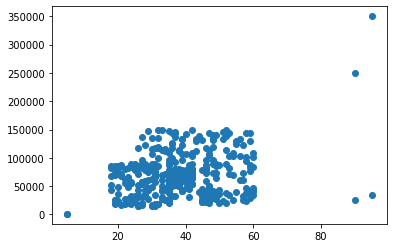

In [93]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [94]:

X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 4), (122, 4))

In [ ]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# conda create -n envname python = 2.10 libraries -y                   - y means confirmation

# conda create -n project python=3.10 flask pandas pip -y
# install = flask, pandas - y

# frontend use - flask 
# htmldog.com - website
# getbootstrap.com - website

# realtion between flask and html
# flask micro frame - 2 parts - client- send req / recieve response ==== server- handling request give back response 
#flask help krta hai server bnane me
# frontend - html + css + js ***** html use for structure + css - for design + bootstamp for 5 css frame work
# backend - python + database

In [1]:
# js - is for behaviour in frontend page  # jquery library ka use krnge

In [2]:
# Vscode extension
# Happy flasker
# js + jquery - jquery code snippet
# Bootstrao - Bootstrap 5 quick snippets
# SQlite

In [ ]:
# > Static     --------------------------------- Resources
  # >Images
  # > css
  # > js
  # > fonts
  # > upload

# Files      -------------------------------------- Pyhton
  # file - app.py - flask realted code
  # supporting file ---- logic.py
  # database file --- database.py

# frontend UI        ----------------------------- Html jinjaz
  # > tempates index.html

# Read.me 